## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [37]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [39]:
data = get_data(data_path='motorbike_ambulance_calls.csv')
data

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [40]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [41]:
data.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [42]:
data.max()

index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

In [43]:
print(data.shape)

(17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** перевірте всі змінні на наявність пропусків.

In [45]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Ми дізналися основну статистичну інформацію по числовим змінним і можемо приблизно уявити з чим нам потрібно буде працювати. Дізналися максимальльні і мінімальні значення по кожній змінній. І також дізналися розмірність нашого датасету. 
2. Ми дізналися типи даних та кількість даних по кожній змінній. Бачимо що практично всі атрибути мають числові значення і лише два мають тип object. Це спростить нам аналіз адже моделі машиного навчання завджи краще сприймають і аналізують числові значення.
3. Ми перевірили чи немає у нас пропусків. Як виявилося їх немає і це чудово адже ми зможемо використовувати всі атрибути і не видаляти деякі за ознакою що більше 80% значень пропущено

Ці всі аспекти дають нам розуміння ситуації і якщо в нас вже є великий досвід можемо робити припущення про подальший аналіз який потрібно буде провести, тобто змінити колонки, видалити певні атрибути, змінити типи даних атрибутів. Перетворити на числові або категоріальні зміні.

**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [46]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  print(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]


C:\Users\user\AppData\Local\Temp\ipykernel_17812\1648367148.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [47]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


**Уour conclusions**: Ми перетворили зміну date з типу даних object в datetime. Також ми встановили часові межі датасету і тим самим переконалися що дані у нас справді зібрані за два роки.


#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [48]:
data_categorical = data[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]

data_categorical

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
17374,spring,1,12,19,0,1,1,2
17375,spring,1,12,20,0,1,1,2
17376,spring,1,12,21,0,1,1,1
17377,spring,1,12,22,0,1,1,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [49]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = data['season'].replace({'spring':1, 'summer':2, 'autumn':3, 'winter':4})
  return df
  
data = encode_season(data, 'season')
data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

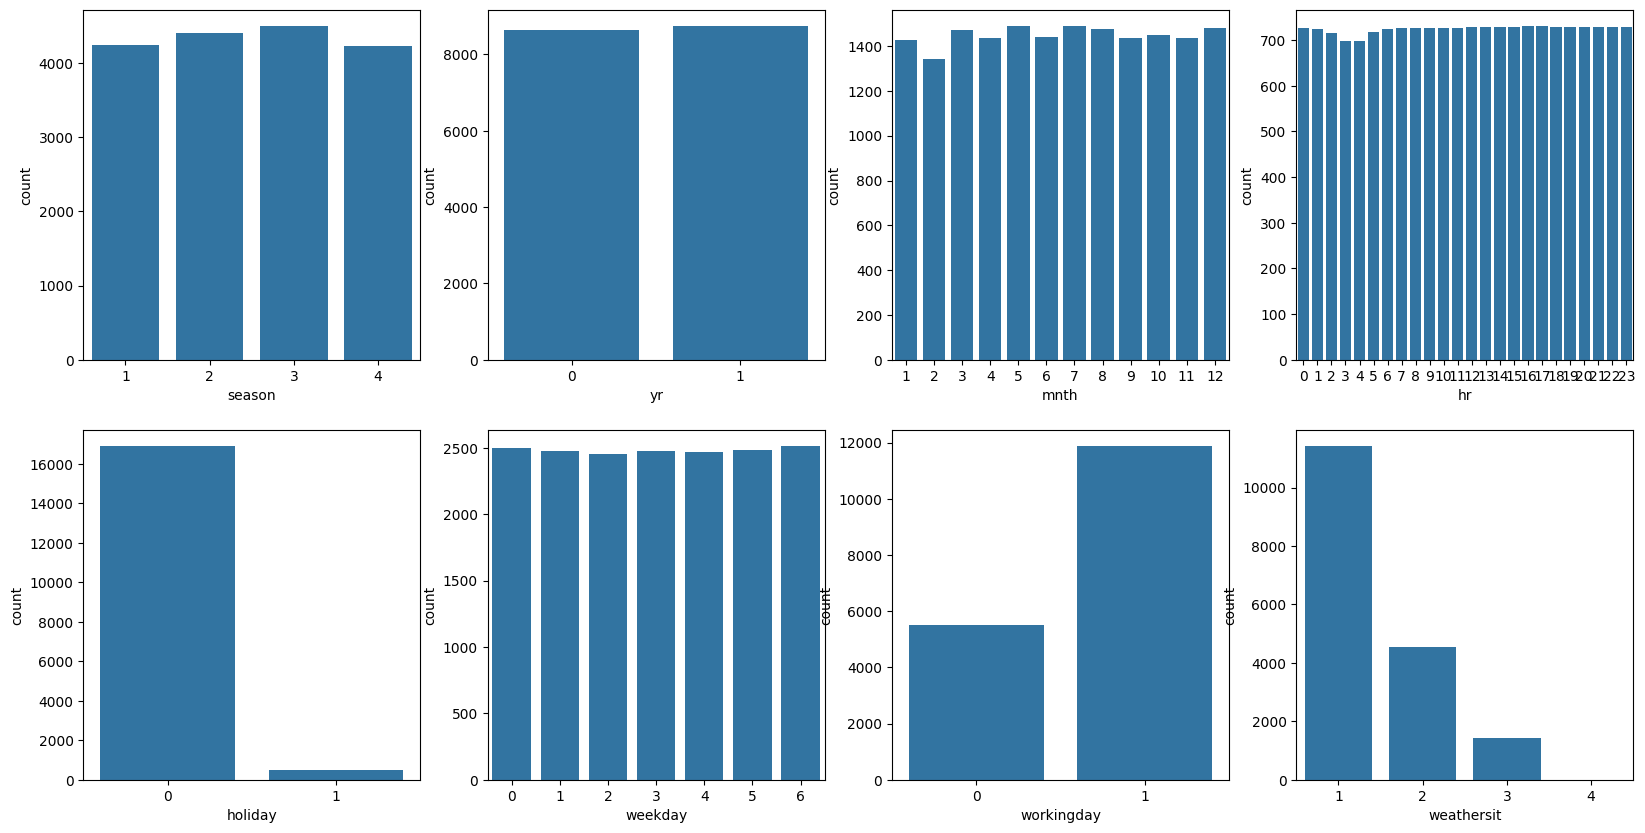

In [50]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable,data=data, ax=subplot)

plt.show()

**Висновки з 5-7 завдання (детальні)**



1. Ми виділили категоріальні змінні в окремий датасет для зручності і для того щоб не втратити наші категоріальні зміні.   
2. Ми перетворили атрибут Season в числову шкалу а також перетворили в категоріальну зміну. Це спростить нам подальший аналіз адже в нашому датасеті Season може відігравати важливу роль для подальшого аналізу.
3. Побудували графіки і бачимо що зміні йдуть рівномірно, і поки що нічого не можна сказати як буде розвиватися подальший аналіз.



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [51]:
data_numerical = data[['temp','hum','windspeed','atemp','cnt']]
data_numerical

,temp,hum,windspeed,atemp,cnt
0,0.24,0.81,0.0000,0.2879,16
1,0.22,0.80,0.0000,0.2727,40
2,0.22,0.80,0.0000,0.2727,32
3,0.24,0.75,0.0000,0.2879,13
4,0.24,0.75,0.0000,0.2879,1
...,...,...,...,...,...
17374,0.26,0.60,0.1642,0.2576,119
17375,0.26,0.60,0.1642,0.2576,89
17376,0.26,0.60,0.1642,0.2576,90
17377,0.26,0.56,0.1343,0.2727,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

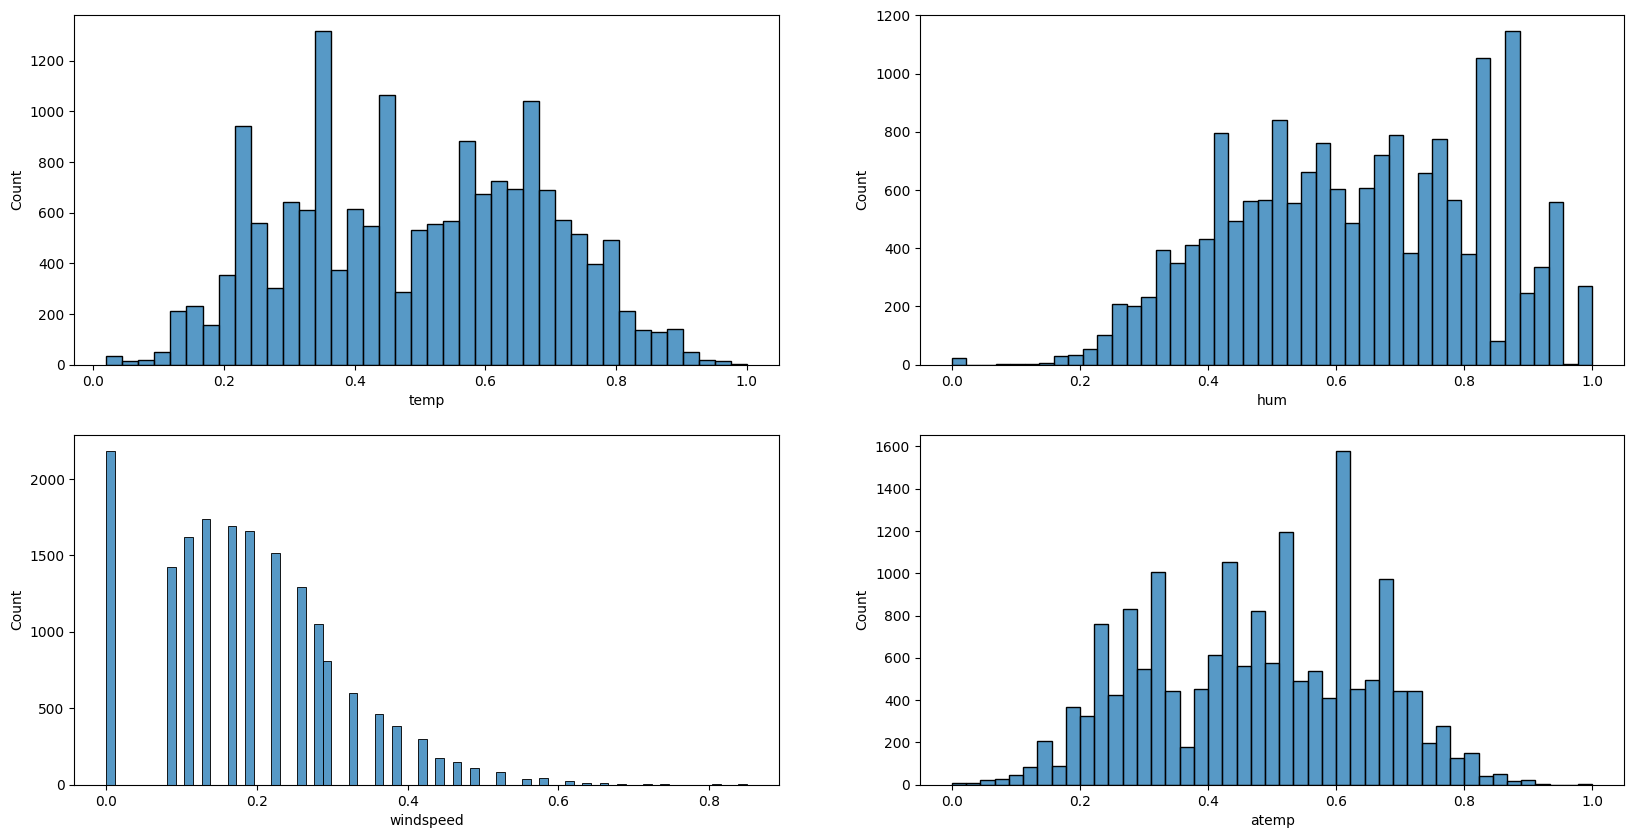

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x=variable,data=data, ax=subplot)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness:  1.2774116037490577


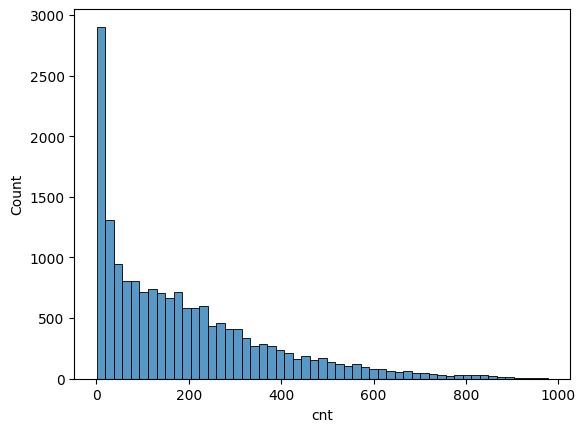

In [53]:
sns.histplot(data['cnt'])
cooficient_skew = data['cnt'].skew()
print("Skewness: ", cooficient_skew)
plt.show()

**Висновки з 8-10 завдання (детальні)**



1. Виділення всіх числових змінних в окремий датасет спросить нам аналіз а також ми точно будемо використовувати тільки числові змінні
2. Бачимо що в нас є експоненціальні розподіли, біномальні. Це дасть нам іфномрацію про дані і ми можемо на основі цього робити припущення про подальший аналіз
3. Коофіцієн нахилу у нас вийшов більшим 0 і дорівює 1.2774116037490577. Це означає що більшість даних зосереджена ліворуч від середнього значення. Це також означає, що ми маємо довгий хвіст який тягнеться вправо. Це може вказувати на наявність викидів в даних, які можуть вплинути на наші статистичні висновки.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

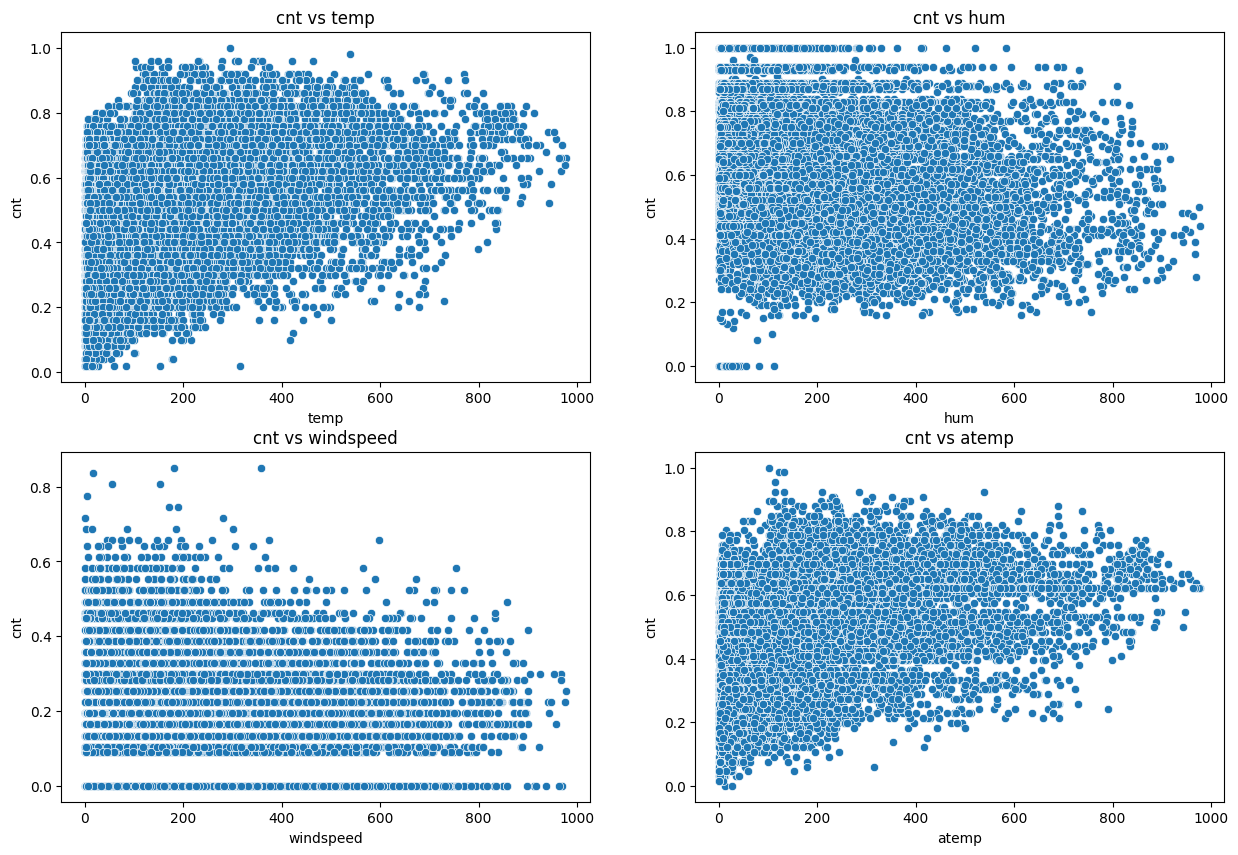

In [54]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(x='cnt' , y=var, data=data_numerical , ax= subplot)
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')


plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

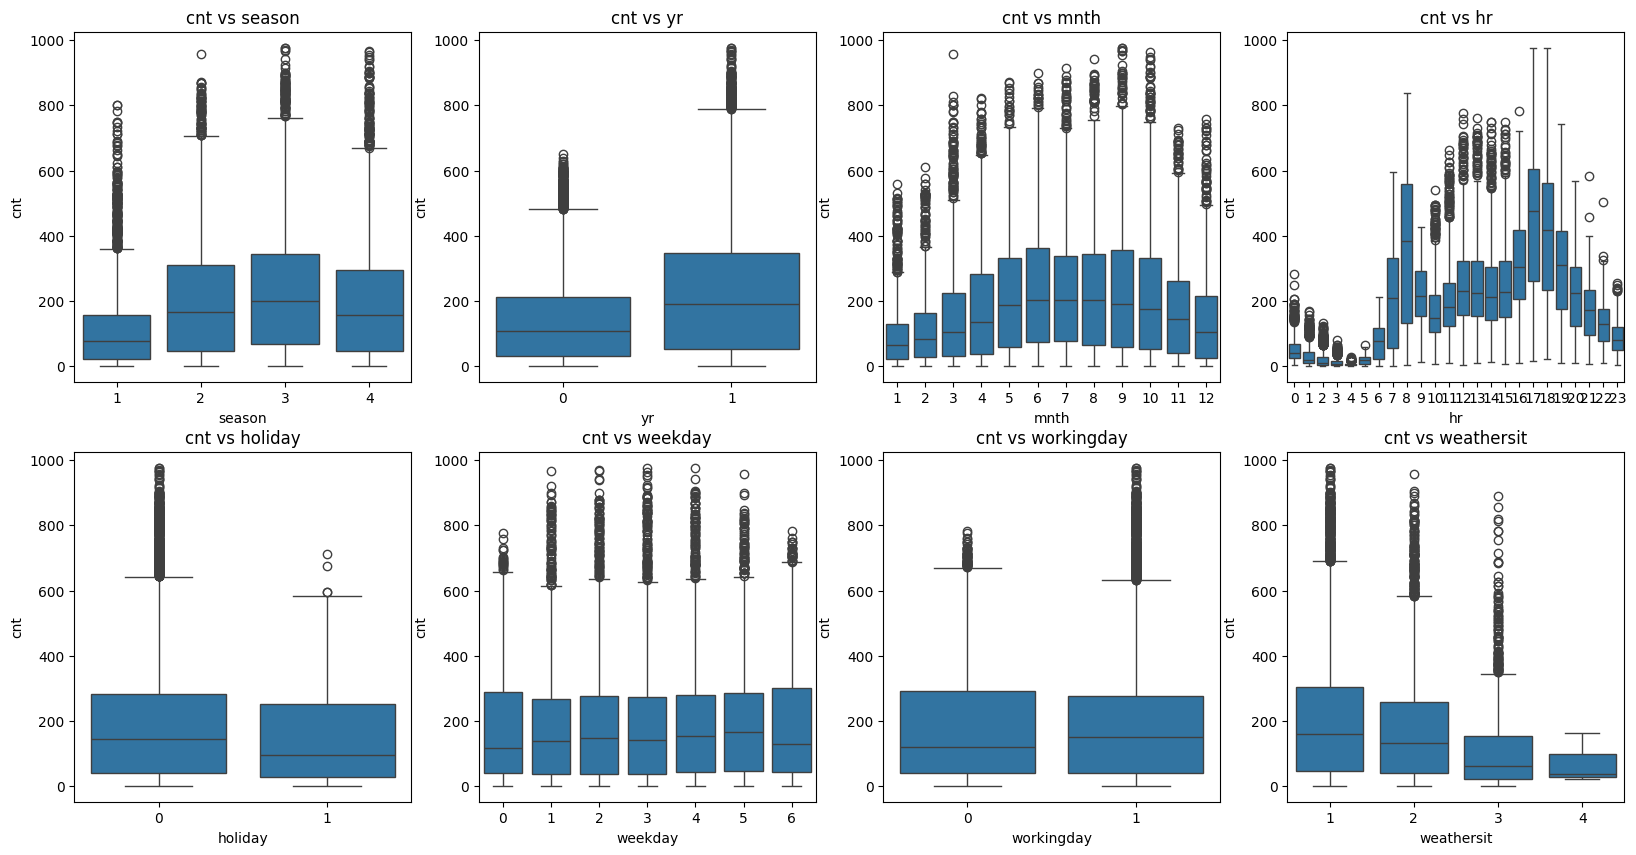

In [55]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=var , y= 'cnt', data=data , ax= subplot)
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.show()

**Висновки з 11-12 завдання (детальні)**



1. Після побудови графіка співвідношення між всіма числовими змінними і цільовою змінною `cnt` можна побачити певну залежність. Наприклад `cnt i temp`, видно що чим більша була температура тим більше викликів було, і це логічно ,адже більше мотоциклістів їздять літом-весною, а в зимку-осени їхня кількість значно зменшується.Графік `cnt i windspeed` показує дуже прямі лінії тобто вітер був стабільним, а також можна побачити що при дуже сильній швидкості вітру викликів було мінімально, а в слабкий вітер або безвіряну погоду викликів найбільше. 
2. За boxplot-ами можемо побачити що все відбувається в межах норми, наприклад` з 0-5 години` викливів практично немає бо люди сплять а вже в `8 годині` коли люди їдуть на роботу кількість викликів найбільша, потім все йде на спад і вже `з 17-18 години` бачимо знов зріст викликів коли всі люди їдуть з роботи, тобто бачимо таку залежність. На кожному дні тижня кількість викликів практично однакова. Також бачимо що чим чистіша і краща була погода викликів більше, і поступово чим стає гіршою погода спадає і наш графік.




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

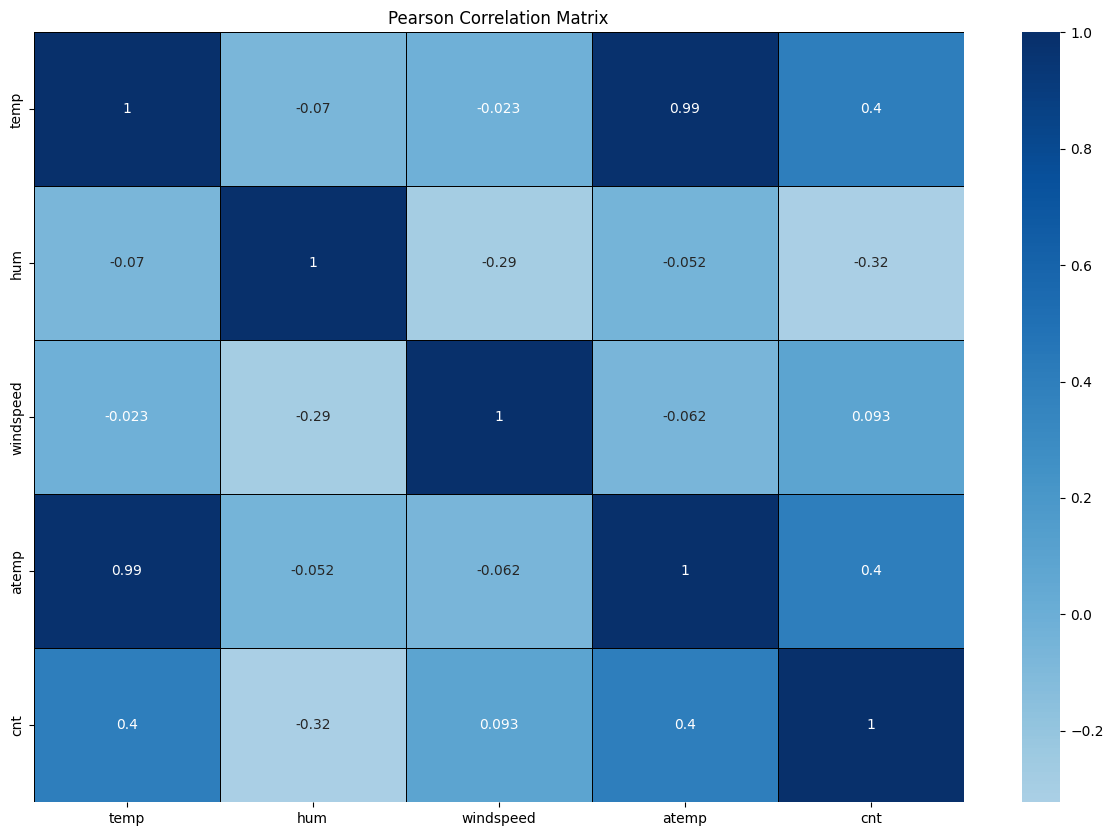

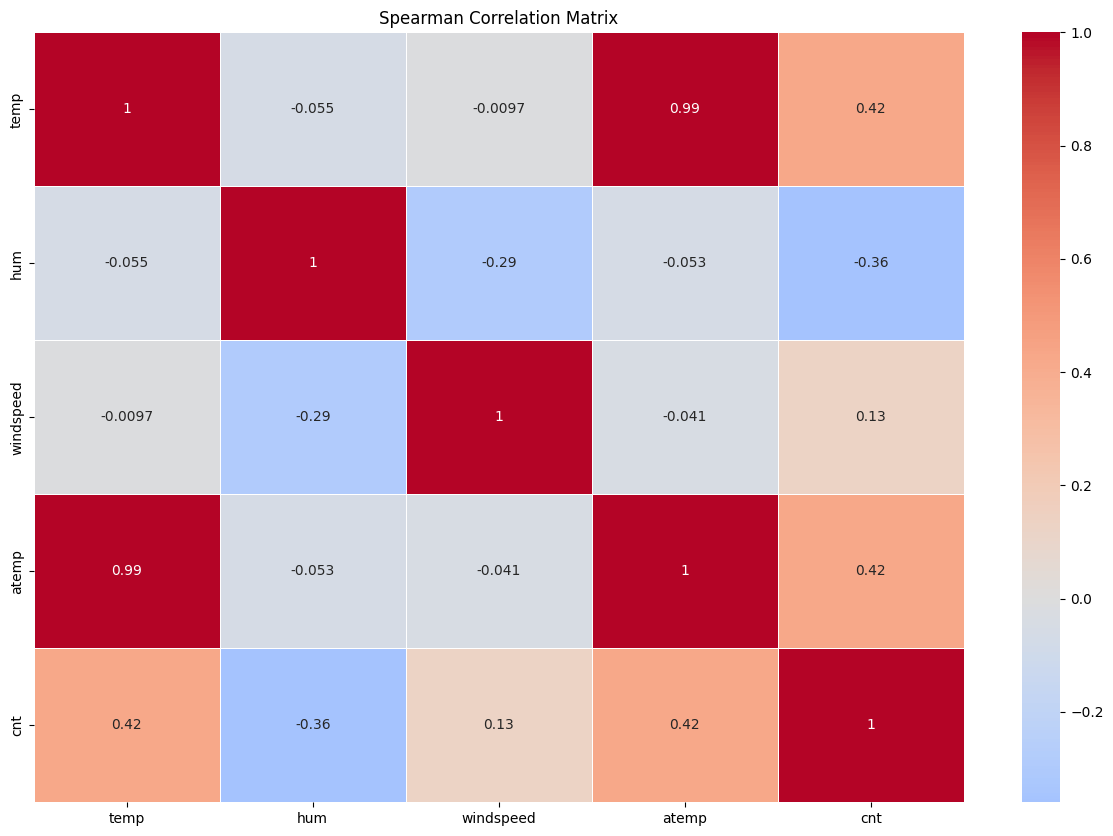

In [56]:
corr_coof_Pearson = data_numerical.corr(method='pearson')

corr_coof_Spearman = data_numerical.corr(method='spearman')

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr_coof_Pearson, annot=True, cmap='Blues', center=0,linewidths=0.5,  linecolor='black', ax=ax)
ax.set_title("Pearson Correlation Matrix")

plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_coof_Spearman, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='white', ax=ax)
ax.set_title("Spearman Correlation Matrix")
plt.show()

In [69]:
print("Pearson correlation matrix:")
print(corr_coof_Pearson)
print("\nSpearman correlation matrix:")
print(corr_coof_Spearman)


print("\nThe Pearson correlation coefficient measures the linear relationship between two variables, while the Spearman correlation coefficient measures the monotonic relationship between two variables.")
print("Linear relationships are those where the relationship between variables can be described by a straight line, whereas monotonic relationships are those where the relationship between variables can be described by a straight line, but not necessarily a straight line.")
print("The Pearson correlation coefficient is sensitive to outliers, while the Spearman correlation coefficient is less sensitive to outliers.")

Pearson correlation matrix:
               temp       hum  windspeed     atemp       cnt
temp       1.000000 -0.069881  -0.023125  0.987672  0.404772
hum       -0.069881  1.000000  -0.290105 -0.051918 -0.322911
windspeed -0.023125 -0.290105   1.000000 -0.062336  0.093234
atemp      0.987672 -0.051918  -0.062336  1.000000  0.400929
cnt        0.404772 -0.322911   0.093234  0.400929  1.000000

Spearman correlation matrix:
               temp       hum  windspeed     atemp       cnt
temp       1.000000 -0.055408  -0.009719  0.989633  0.423330
hum       -0.055408  1.000000  -0.293913 -0.052617 -0.359614
windspeed -0.009719 -0.293913   1.000000 -0.041091  0.126629
atemp      0.989633 -0.052617  -0.041091  1.000000  0.423258
cnt        0.423330 -0.359614   0.126629  0.423258  1.000000

The Pearson correlation coefficient measures the linear relationship between two variables, while the Spearman correlation coefficient measures the monotonic relationship between two variables.
Linear relation

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [58]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season']),
                      pd.get_dummies(df['mnth']),
                      pd.get_dummies(df['weekday']),
                      pd.get_dummies(df['weathersit']),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [59]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [60]:
features['night_hours'] = (data['hr'] >= 22) | (data['hr'] <= 5)
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [61]:
features_lr = features.drop(['atemp', 'date'], axis = 1)


In [62]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis = 1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [64]:
def train_linear_model(X_train, y_train):
  X_train.columns = X_train.columns.astype(str)
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [65]:
# predict
y_train_pred = model.predict(X_train)
X_test.columns = X_test.columns.astype(str)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15877.966, test: 15224.769
R^2 train: 0.525, test: 0.518


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

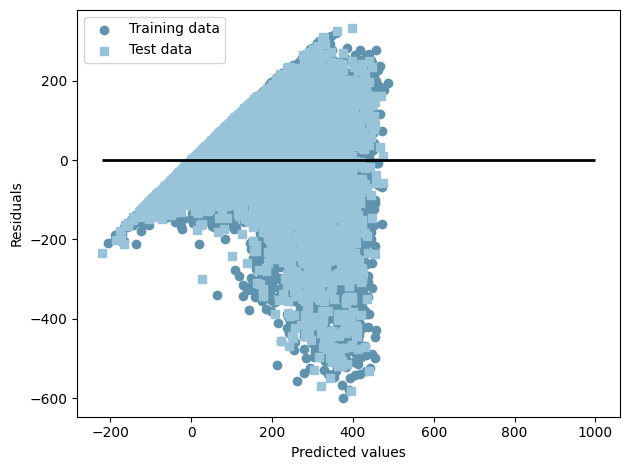

In [66]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1.   За графіком бачимо що наша лінійна регресія працює. Training data буде давати більш точну оцінку ніж Test data.
2.   Після обчислень R^2 train можемо побачити що наша модель буде давати правильну оцінку в 52.5% випадках.
3.   Ми видалили date тому що воно не є необхідною для нашої моделі. А зміну atemp ми видаляємо через те що вона викликає мультиколінеарність з зміною temp. Видаляємо саме atemp тому що вона вказує не на фактичну темпертатуру, а по відчуттях людини, що є дуже суб'єктивною думкою, тому залишаємо фактичну температуру temp.


